# Trabajo computacional 1. Ejercicio 2

Considere la red social de 62 delfines de Nueva Zelanda (*dolphins.txt*):

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

G=nx.read_gml("data/dolphins.gml")
genero=ldata("data/dolphinsGender.txt")

**a.** Examine diferentes opciones de layout para este grafo e identifique la que le resulte más informativa. Justifique su elección detallando las características estructurales de la red que su elección pone en evidencia. Incluya en la representación gráfica de la red información sobre el sexo de los delfines.

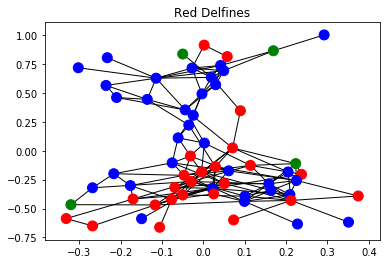

In [3]:
f=[]                     ##f es la lista de nodos tal cual los ordena el nx. Es una especie de orden alfabético
for n in nx.nodes(G):
    f.append(n)

F=[]                    ##F va a ser el nuevo vector de nodo-genero pero ordenando los nodos de la misma manera que lo hace nx
for n in f:
   for k,g in genero:
        if k==n:
            F.append([k,g])
# a=0                        ##Todo esto cuenta cuántos nodos de f coinciden con los nodos de F. Es decir, se fija si están en el mismo orden las dos listas de nodos
# k=0
# for n in f:
#    k+=1
#    if n==F[k-1][0]:
#         a+=1
# a
SG=dict(F)              ##Se le da atributos a los nodos.
nx.set_node_attributes(G, SG,"genero")

options={'with_labels':False,
        'node_color':["r" if g=="f" else "b" if g=="m" else "g" for n,g in F],
        'font_weight':'bold',
        'node_size':100}
plt.title("Red Delfines")

nx.draw_networkx(G,**options)
plt.show()

En el gráfico se muestra el grafo con el género de cada nodo: en azul machos, en rojo las hembras y en verde los especímenes no identificados. 

Si bien podríamos haber recorrido otros layouts, aquellos que ya están dados por default (shell, circular, etc.) no aportan mucha información sobre la red y su topología. Por ejemplo, debajo se presenta un layout tipo shell, pero puede verse que no aporta ninguna información adicional de la red. En este sentido, el spring que utiliza networkx por default parece más adecuado ya que podemos ver dos grupos marcados según su género, si bien quedan nodos por fuera de los mismos.
Sería interesante poder manejar la herramienta layout para generar tres anillos: uno con los machos que se relacionan más que nada entre sí, otro con las hembras que también se relacionan mayormente entre sí y un anillo intermedio con aquellos nodos que funcionan de puente entre ambos géneros (esto último, no es necesario hacerlo con anillos, también pueden mostrarse dos grandes  clusters y los nodos que sean puentes entre ambos que vayan en el medio).


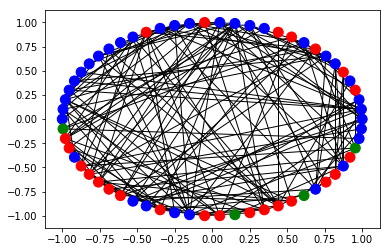

In [4]:
#Layout tipo shell, no aporta información relevante sobre la tipología de la red. Además, no trata de minimizar el cruce entre enlaces.

posi = nx.shell_layout(G, nlist=None, scale=1, center=None, dim=2)
nx.draw_networkx(G,**options, pos=posi)     
plt.show()

A continuación se presenta el conteo de cada género reportado:24 hembras, 34 machos y 4 no especificados. 

In [5]:
f=0                 ##Cuenta cuántos femeninos, masculinos y NA hay. 
m=0
NA=0
for n,g in genero:
   if g=="f":
    f+=1
   else:
    if g=="m":
        m+=1
    else:
        NA+=1
print(f,m,NA)


24 34 4


**b.** ¿Se trata una red donde prevalece la homofilia en la variable género?
  

 *i.* Considere la distribución nula para la fracción de enlaces que vinculan géneros diferentes, generada a partir de al menos 1000 asignaciones aleatorias de género.


En primer lugar se calculó en la red real el número de enlaces entre los distintos tipos de nodos de acuerdo a su género: macho-macho (MM), hembra-hembra (FF), macho-no asignado (NAM), hembra-no asignado (NAF) Y no asignado-no asignado (NANA). La cantidad de enlaces macho-hembra (MF) se obtuvo restando al número total de enlaces, los enlaces anteriormente señalados. Diviendo por el número total de enlaces se obtuvo la probabilidad frecuentista de enlaces de cada tipo. Las probabilidades están en el orden en que fueron mencionados los enlaces anteriormente.


In [6]:
Enlaces_P=[]     #Lista de enlaces que también incluye los generos de los nodos del enlace              
GENERO=nx.get_node_attributes(G,"genero") #me devuelve un diccionario con los nodos y su genero
for n in G.edges:
    Enlaces_P.append([n[0],GENERO[n[0]],n[1],GENERO[n[1]]])
EnlacesMM_P=[] #Lista de enlaces macho-macho
for n,m,o,p in Enlaces_P:
    if m=="m" and p=="m":
        EnlacesMM_P.append([n,o])
EnlacesFF_P=[] #Lista de enlaces hembra-hembra
for n,m,o,p in Enlaces_P:
    if m=="f" and p=="f":
        EnlacesFF_P.append([n,o])
EnlacesNAM_P=[] #Lista de enlaces no asignado-macho (en cualquier orden, por eso el dobre if)
for n,m,o,p in Enlaces_P:
    if m=="NA" and p=="m":
            EnlacesNAM_P.append([n,o])        
    if  m=="m" and p=="NA":
            EnlacesNAM_P.append([n,o])
EnlacesNAF_P=[] #Lista de enlaces no asignado-hembra (en cualquier orden, por eso el dobre if)
for n,m,o,p in Enlaces_P:
    if m=="NA" and p=="f":
        EnlacesNAF_P.append([n,o]) 
    if m=="f" and p=="NA":
        EnlacesNAF_P.append([n,o])
EnlacesNANA_P=[] #Lista de enlaces no asignado-no asignado
for n,m,o,p in Enlaces_P:
    if m=="NA" and p=="NA":
        EnlacesNANA_P.append([n,o])  
        
Probabilidad_de_enlaces_P=(len(EnlacesMM_P)/len(Enlaces_P),
                           len(EnlacesFF_P)/len(Enlaces_P),
                           len(EnlacesNAM_P)/len(Enlaces_P),
                           len(EnlacesNAF_P)/len(Enlaces_P),
                           len(EnlacesNANA_P)/len(Enlaces_P),
                           (len(Enlaces_P)-len(EnlacesFF_P)-len(EnlacesMM_P)-len(EnlacesNAM_P)-len(EnlacesNAF_P)-len(EnlacesNANA_P))/len(Enlaces_P),(len(EnlacesMM_P)+len(EnlacesFF_P))/len(Enlaces_P))
prob=("MM","FF","NAM","NAF","NANA","MF","MM+FF")
print(prob)
print(Probabilidad_de_enlaces_P)
sum(Probabilidad_de_enlaces_P)-Probabilidad_de_enlaces_P[-1] #Van a sumar 1 si le resto el sexto elemento de Probabilidades_de_enlaces , es decir, MM+FF 


('MM', 'FF', 'NAM', 'NAF', 'NANA', 'MF', 'MM+FF')
(0.37735849056603776, 0.22641509433962265, 0.0440251572327044, 0.025157232704402517, 0.0, 0.3270440251572327, 0.6037735849056604)


0.9999999999999999

In [7]:
Enlaces_mismo_gen=((len(EnlacesMM_P)+ len(EnlacesFF_P))/len(Enlaces_P)) 
print(Enlaces_mismo_gen)

0.6037735849056604


**Distribución nula**: ahora se generaron redes con asignaciones de género al azar para sus nodos. Para el modelo nulo se decidió mantener el número de nodos de cada género, para poder identificar cuán probables son los enlaces entre delfines del mismo y distinto género que se obtienen del grafo original. Para esto, se trabajó con la lista de nodo-género original, separando la columna de géneros y reasignándolos al azar con la funcion *np.random.shuffle*. Con esto se genera una nueva lista que se usará para darle atributos al grafo. Se calculó la probabilidad de enlaces entre distintos géneros de la misma forma que con la red original.

In [8]:
def Genero_al_azar(Gen): #Gen es la lista de nodos-genero a utilizar 
    
    N=[] #lista con nodos
    J=[] # lista con generos
    for n,g in Gen: #n es el nodo, g el genero
        N.append(n)
        J.append(g)
    np.random.shuffle(J) #ordeno de forma random la lista de generos 
    
    F_Gen=[] #lista nodos-genero pero con los generos ordenados al azar 
    for n in range(len(N)):
        F_Gen.append([N[n],J[n]])
    SG_0=dict(F_Gen)                              
    nx.set_node_attributes(G, SG_0,"genero") 
    
    Enlaces=[]    #Lista (para la red con generos aleatorios) de enlaces que también incluye los generos de los nodos del enlace                  
    GENERO=nx.get_node_attributes(G,"genero")
    for n in G.edges:
        Enlaces.append([n[0],GENERO[n[0]],n[1],GENERO[n[1]]])
    EnlacesMM=[]
    for n,m,o,p in Enlaces:
        if m=="m" and p=="m":
            EnlacesMM.append([n,o])
    EnlacesFF=[]
    for n,m,o,p in Enlaces:
        if m=="f" and p=="f":
            EnlacesFF.append([n,o])
    EnlacesNAM=[]
    for n,m,o,p in Enlaces:
        if m=="NA" and p=="m":
            EnlacesNAM.append([n,o]) 
        if  m=="m" and p=="NA":
            EnlacesNAM.append([n,o])

    EnlacesNAF=[]
    for n,m,o,p in Enlaces:
        if m=="NA" and p=="f":
            EnlacesNAF.append([n,o]) 
        if m=="f" and p=="NA":
            EnlacesNAF.append([n,o])
    EnlacesNANA=[]
    for n,m,o,p in Enlaces:
        if m=="NA" and p=="NA":
            EnlacesNANA.append([n,o])  

    Probabilidad_de_enlaces=(len(EnlacesMM)/len(Enlaces),
                             len(EnlacesFF)/len(Enlaces),
                             len(EnlacesNAM)/len(Enlaces),
                             len(EnlacesNAF)/len(Enlaces),
                             len(EnlacesNANA)/len(Enlaces),
                             (len(Enlaces)-len(EnlacesFF)-len(EnlacesMM)-len(EnlacesNAM)-len(EnlacesNAF)-len(EnlacesNANA))/len(Enlaces), (len(EnlacesMM)+len(EnlacesFF))/len(Enlaces))
    return(Probabilidad_de_enlaces) ##Lista con las probabilidades de sacar un enlace MM,FF, NAM, NAF, NANA, MF Y MM+FF para cada distribución de géneros aleatoria


Se corrió esto 10000 veces y se guardaran en distintas listas las probabilidades de los enlaces MM, FF y MF para cada distribución aleatoria de género. Luego se realizaron histogramas de estas distribuciones y se comparó con el valor de la red real.

In [9]:
Dis_prob_enlaMM=[] ##Vector que va a alojar las prob MM de cada distribución aleatoria de género
Dis_prob_enlaFF=[] ##Vector que va a alojar las prob FF de cada distribución aleatoria de género
Dis_prob_enlaMF=[]##Vector que va a alojar las prob MF de cada distribución aleatoria de género
Dis_prob_enlaMMFF=[] ##Vector que va a alojar las prob MM+FF de cada distribución aleatoria de género
Q=100000
for q in range(0,Q): ##Corro Q veces la función Genero_al_azar para armar la distribución de probabilidades nula
    Dis_prob_enlaMM.append(Genero_al_azar(F)[0])
    Dis_prob_enlaFF.append(Genero_al_azar(F)[1])
    Dis_prob_enlaMF.append(Genero_al_azar(F)[5])
    Dis_prob_enlaMMFF.append(Genero_al_azar(F)[6])


Ahora construimos histogramas de probabilidad en función del número de aparición de dichas probabilidades en las distribuciones aleatorias. A su vez, en cada histograma se muestra cuál es la probabilidad calculada para la red real estudiada

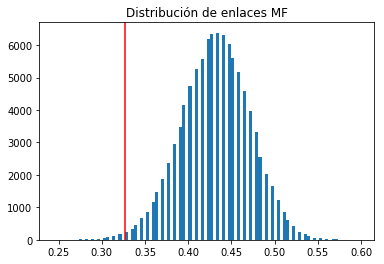

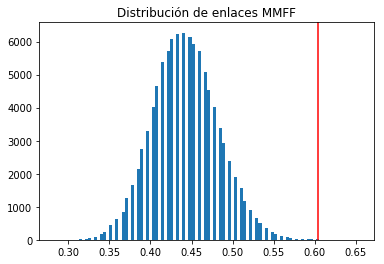

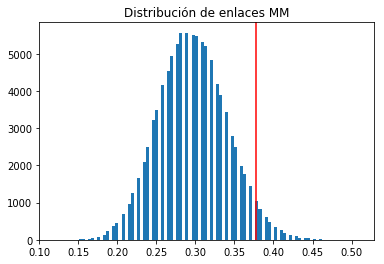

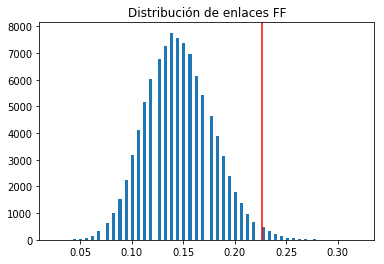

In [10]:
bineo=100
plt.hist(Dis_prob_enlaMF,bins=bineo)
plt.axvline(Probabilidad_de_enlaces_P[5],c="red")
plt.title("Distribución de enlaces MF")
plt.show()

plt.hist(Dis_prob_enlaMMFF,bins=bineo)
plt.axvline(Probabilidad_de_enlaces_P[6],c="red")
plt.title("Distribución de enlaces MMFF")
plt.show()

plt.hist(Dis_prob_enlaMM,bins=bineo)
plt.axvline(Probabilidad_de_enlaces_P[0],c="red")
plt.title("Distribución de enlaces MM")
plt.show()

plt.hist(Dis_prob_enlaFF, bins=bineo)
plt.axvline(Probabilidad_de_enlaces_P[1],c="red")
plt.title("Distribución de enlaces FF")
plt.show()

Se observa que la probabilidad de enlace MM y FF Y MM+FF están por arriba de la media de las distribuciones aleatorias en género, lo que corresponderia a una tendencia homofílica. Una manera de cuantificarlo es dando el *p-value* para cada caso.

iii. Estime la significancia estadística (p-valor) del valor observado en el caso de la red real.

In [11]:
##Veamos cuántos eventos son más extremos que los obtenidos para nuestra red en particular

histMF=np.histogram(Dis_prob_enlaMF,bins=bineo)
histMM=np.histogram(Dis_prob_enlaMM,bins=bineo)
histFF=np.histogram(Dis_prob_enlaFF,bins=bineo)
histMMFF=np.histogram(Dis_prob_enlaMMFF,bins=bineo)
pMF=Probabilidad_de_enlaces_P[5]
pMM=Probabilidad_de_enlaces_P[0]
pFF=Probabilidad_de_enlaces_P[1]
pMMFF=Probabilidad_de_enlaces_P[6]
NMF=[] #lista con eventos más improbables que la prob de enlace MF en la red real 
NMM=[] #lista con eventos más improbables que la prob de enlace MM en la red real 
NFF=[] #lista con eventos más improbables que la prob de enlace FF en la red real 
NMMFF=[]
for i in range(len(histMF[0])):
    if histMF[1][i]<pMF:
        NMF.append(histMF[0][i])
for i in range(len(histMM[0])):
    if histMM[1][i]>pMM:
        NMM.append(histMM[0][i])
for i in range(len(histFF[0])):
    if histFF[1][i]>pFF:
        NFF.append(histFF[0][i])
for i in range(len(histMMFF[0])):
    if histMMFF[1][i]>pMMFF:
        NMMFF.append(histFF[0][i])        

Que_tan_anomala_es_la_red=[sum(NMF)/Q,sum(NMM)/Q,sum(NFF)/Q, sum(NMMFF)/Q]  #Sumo para cada tipo de enlace todos los eventos más improbables que su determinada probabilidad en la red real 
print(Que_tan_anomala_es_la_red)


[0.00734, 0.03165, 0.00861, 0.00013]


Puede verse entonces que efectivamente en la red estudiada prevalece la homofilia en la variable género, ya que lo observado en nuestra red representa eventos bastante extremos en comparación con lo que podría darse al asignar el género de los nodos de forma aleatoria. En otras palabras, la topografía de la red delfines no es independiente del campo de géneros, sino que están correlacionadas. En cualquiera de los casos, la probabilidad calculada se encuentra por debajo del 5% de los eventos reproducidos aleatoriamente. Más aún, para el caso de enlaces MM-FF, se encuentra por debajo del 0.01%.

**c.*** Identifique alguna metodología basada en observables topológicos para eliminar nodos secuencialmente de la red de manera de dividirla en dos componentes de tamaños comparables en el menor número de pasos. Explique y muestre los resultados obtenidos.
Intente cuantificar su estrategia comparándola con lo que se obtendría al eliminar nodos de manera aleatoria.

El criterio que se decidió usar fue quitar nodos según su grado. A continuación se muestra el grafo con la distribución en sexos y el tamaño del nodo dependiente del grado del mismo.

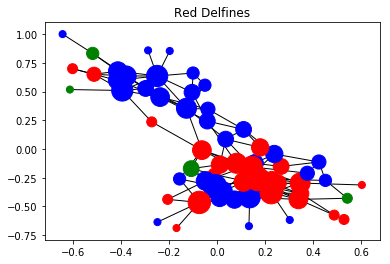

In [12]:
Nodos_genero_grado=[]
for n,g in F: ##F era el vector de nodo-genero pero ordenando los nodos de la misma manera que lo hace nx
    nx.get_node_attributes(G,"grado")
    grado=G.degree(n)
    Nodos_genero_grado.append([n,g,grado])
Nodos_grado=[]
for n,g in F:
    grado=G.degree(n)
    Nodos_grado.append([n,grado])
Nodos_genero_grado
size=50
options1={'with_labels':False,
        'node_color':["r" if g=="f" else "b" if g=="m" else "g" for n,g in F],
        'font_weight':'bold',
        'node_size':[size*k for n,g,k in Nodos_genero_grado]}
plt.title("Red Delfines")

nx.draw_networkx(G,**options1)
plt.show()


Se removieron primero los nodos de menor a mayor grado y se analizó el tamaño de la red (o su componente gigante) en función del número de pasos (igual al número de nodos removidos). Luego se realizó el mismo análisis pero quitando primero los nodos de mayor grado.

In [13]:
G1=nx.read_gml("data/dolphins.gml")
G2=nx.read_gml("data/dolphins.gml")
F=dict(genero)
K=dict(Nodos_grado) #Nodos_grado tenia lista con nodo-grado 
nx.set_node_attributes(G1, F,"genero")
nx.set_node_attributes(G1,K,"grado")

Grado_nodo=[] ##Lista con el grado y el nodo dada de forma aleatoria. Se decide porner primero el grado ya que esto permite el ordenamiento según el grado usando sorted.
for n,g in Nodos_grado:
    Grado_nodo.append([g,n])
GNordenado=sorted(Grado_nodo) ##Lista con el grado y el nodo ordenada de menor a mayor grado
GNordenadoUP=sorted(Grado_nodo,reverse=True) ##Lista con el grado y el nodo ordenada de mayor a menor en el grado     

    

Acá se definen tres funciones:

Nnodos: cuenta el número de nodos de la componente gigante de un grafo

Sacando_nodos: al darle un Grafo y una lista (que va a ser la de Grado_nodo ordenada), va sacando nodos de a uno (en este caso a partir de su grado), y nos entrega el tamaño de la componente gigante en función del número de nodos sacados.

Shuffle_en_nodo: toma una lista ordenada (hay que decirle si está de mayor a menor o de menor a mayor e indicarle el grado máximo del grafo) y devuelve la misma lista pero con los nodos mezclados según su grado. Es decir, deja inalterada la columna de los grados y no cambia el grado de cada nodo. Simplemente shufflea los nodos de, por ejemplo, grado uno entre sí, y así con todos los grados. Esta es la que va a permitir iterar tantas veces como sea necesario a la hora de sacar los nodos de un grafo.

In [14]:
def Nnodos (H):    
    Gcc = sorted(nx.connected_component_subgraphs(H), key=len, reverse=True) #ordeno los subgrafos de mayor a menor segun su tama;o
    G0 = Gcc[0] #componente gigante 
    return G0.number_of_nodes() #función que me devuelve el número de nodos de la componente gigante de un grafo
    
def Sacando_nodos(Grafo,GN):
    NnodosComponenteGigante=[]
    NodosQueSaco=[]
    N=0
    for g,n in GN:
        if N<61:#número de nodos menos 1 

            N+=1
            Grafo.remove_node(n)
            NnodosComponenteGigante.append(Nnodos(Grafo)) #me devuelve el número de nodos de la componente gigante 
            NodosQueSaco.append(N) #me devuelve el número de nodos que saque hasta el momento (=número de pasos)

    return NnodosComponenteGigante, NodosQueSaco

def Shuffle_en_nodo(lista,orden,GradoMaximo):  #función que me devuelve lista de grado-nodo pero que shufflea dentro de los nodos de mismo grado 
    GNordenado_shuflle=[]
    RANGO=[i for i in range(GradoMaximo+1)]
    if orden=="AS":
        for i in RANGO:
            GRADO=[]
            NODO=[]

            for j in lista:
                if j[0]==i:
                    GRADO.append(j[0])
                    NODO.append(j[1])

            random.shuffle(NODO)
            a=0
            for h in GRADO:
                GNordenado_shuflle.append([h,NODO[a]])
                a+=1
    else:
        for i in sorted(RANGO,reverse=True):
            GRADO=[]
            NODO=[]

            for j in lista:
                if j[0]==i:
                    GRADO.append(j[0])
                    NODO.append(j[1])

            random.shuffle(NODO)
            a=0
            for h in GRADO:
                GNordenado_shuflle.append([h,NODO[a]])
                a+=1
        
    return GNordenado_shuflle

Ahora lo que hacemos es sacar de a 1 nodo, sacandolos según su grado (de mayor a menor o viceversa). En cada paso, es decir, cada vez que sacamos un nodo, registramos el número de paso y el tamaño de la componente gigante. Este procedimiento se va a iterar 1000 veces para poder luego sacar un promedio de los datos. 

In [15]:
iteraciones=1000 

GNordenado=sorted(Grado_nodo) #ordeno la lista Grado_nodo de menor a mayor grado 
GNordenadoUP=sorted(Grado_nodo,reverse=True) #ordeno la lista Grado_nodo de mayor a menor grado 

X_ascendente=[]
Y_ascendente=[]

X_descendente=[]
Y_descendente=[]
for i in range(iteraciones):

    
    ShuffleAS=Shuffle_en_nodo(GNordenado,"AS",12) #lista con grado-nodo ordenado de menor a mayor grado pero shufflea dentro de los nodos de mismo grado en cada iteracion
    ShuffleUP=Shuffle_en_nodo(GNordenadoUP,"UP",12) #lista con grado-nodo ordenado de mayor a menor grado pero shufflea dentro de los nodos en cada iteracion
    
    G1=nx.read_gml("data/dolphins.gml") ##Es necesario regenerar el grafo para cada iteración ya que sacar nodos del grafo
                                        ##no define un nuevo grafo sino que sobreescribe con el que se está trabajando.
    Ascendente=Sacando_nodos(G1,ShuffleAS) #Sacando nodos me devolvia (NnodosComponenteGigante, NodosQueSaco)
    X_ascendente.append(Ascendente[1]) #numero de iteraciones 
    Y_ascendente.append(Ascendente[0]) #numero de nodos de la componente gigante 
    
    G1=nx.read_gml("data/dolphins.gml")
    Descendente=Sacando_nodos(G1,ShuffleUP)
    X_descendente.append(Descendente[1])
    Y_descendente.append(Descendente[0])
    



Ahora tenemos que promediar la data sobre todas las iteraciones. Se decidió asignarle un error al tamaño de la componente gigante teniendo en cuenta la desviación estándar de los tamaños obtenidos en las distintas iteraciones para el mismo número de nodo sacado (mismo número de paso). Cuando este se grafique se verá que no resulta muy significante.

In [16]:
##Acá está la data promediada: promedio sobre las 1000 iteraciones el tama;o de la componente gigante en el paso i-esimo

X_ascendente_promedio=[]   ##Esto no hace falta promediarlo, va siempre de 0-60 (es el número de paso en cada iteración), subiendo de a uno 
Y_ascendente_promedio=[]
Y_as_error=[]

X_descendente_promedio=[]  ##Esto no hace falta promediarlo, va siempre de 0-60, subiendo de a uno
Y_descendente_promedio=[]
Y_des_error=[]
for i in range(61):
    listaXAS=[]
    listaYAS=[]
    listaXUP=[]
    listaYUP=[]

    for j in range(iteraciones):
        listaXAS.append(X_ascendente[j][i])
        listaYAS.append(Y_ascendente[j][i])
        
        listaXUP.append(X_descendente[j][i])
        listaYUP.append(Y_descendente[j][i])
        
    Y_as_error.append(np.sqrt(np.std(listaYAS)))
    Y_des_error.append(np.sqrt(np.std(listaYUP)))
        
    X_ascendente_promedio.append(sum(listaXAS)/iteraciones)
    Y_ascendente_promedio.append(sum(listaYAS)/iteraciones)
    X_descendente_promedio.append(sum(listaXUP)/iteraciones)
    Y_descendente_promedio.append(sum(listaYUP)/iteraciones)

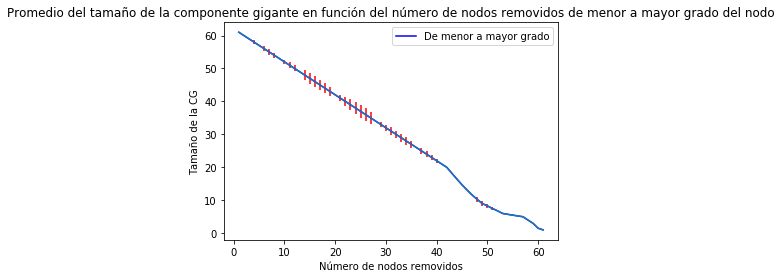

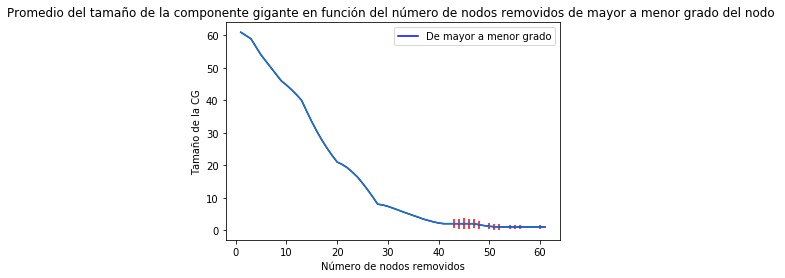

In [17]:
plt.errorbar(X_ascendente_promedio,Y_ascendente_promedio, yerr=np.array(Y_des_error),ecolor="r",)
plt.plot(X_ascendente_promedio,Y_ascendente_promedio,label="De menor a mayor grado",c="b")
plt.ylabel("Tamaño de la CG")
plt.xlabel("Número de nodos removidos")
plt.legend()
plt.title("Promedio del tamaño de la componente gigante en función del número de nodos removidos de menor a mayor grado del nodo")
plt.show()

plt.plot(X_descendente_promedio,Y_descendente_promedio, label="De mayor a menor grado",c="b")
plt.ylabel("Tamaño de la CG")
plt.errorbar(X_descendente_promedio,Y_descendente_promedio, yerr=np.array(Y_as_error), ecolor="r")
plt.xlabel("Número de nodos removidos")
plt.legend()
plt.title("Promedio del tamaño de la componente gigante en función del número de nodos removidos de mayor a menor grado del nodo ")
plt.show()

Se observa una caída más abrupta del tamaño de la componente gigante al remover los nodos de mayor grado primero. Esto puede deberse a que ciertos nodos de alta conectividad pueden ensamblar dos subcomponentes del grado, al remover este nodo y todos sus enlaces puede ayudar a la ruptura de la red y a una disminución de la componente gigante.

Ahora lo hacemos sin promediar, hacemos una sola iteración 

In [18]:
Ascendente=Sacando_nodos(G2,GNordenado)


In [19]:
G3=nx.read_gml("data/dolphins.gml")
Descendente=Sacando_nodos(G3,GNordenadoUP)

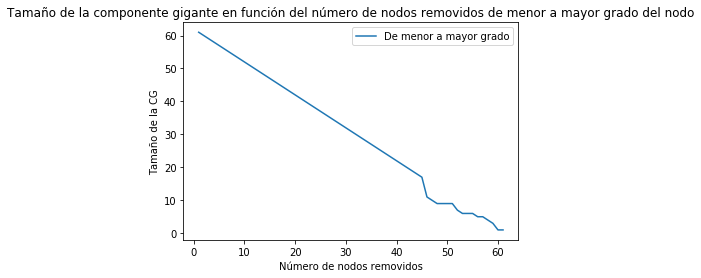

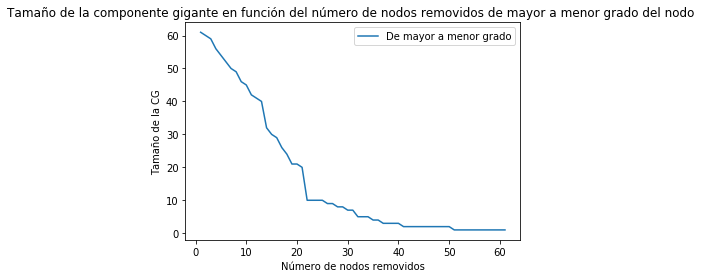

In [20]:
y_Ascendente=Ascendente[0]
x_Ascendente=Ascendente[1]

y_Descendente=Descendente[0]
x_Descendente=Descendente[1]
    
    
plt.plot(x_Ascendente,y_Ascendente,label="De menor a mayor grado")
plt.ylabel("Tamaño de la CG")
plt.xlabel("Número de nodos removidos")
plt.legend()
plt.title("Tamaño de la componente gigante en función del número de nodos removidos de menor a mayor grado del nodo")
plt.show()

plt.plot(x_Descendente,y_Descendente, label="De mayor a menor grado")
plt.ylabel("Tamaño de la CG")
plt.xlabel("Número de nodos removidos")
plt.legend()
plt.title("Tamaño de la componente gigante en función del número de nodos removidos de mayor a menor grado del nodo ")

plt.show()

Cuantitativamente, se observa el mismo comportamiento que promediando sobre las 1000 iteraciones en los dos casos: de mayor a menor grado y viceversa. En el caso de mayor a menor grado, la caída de la componente gigante es más abrupta que en el caso de menor a mayor grado. Sin embargo, cuando se promedia sobre las 1000 iteraciones la caída se hace de alguna forma ¨más suave¨ y menos picuda. 